# Policy Research Candidate Challenge

June 14, 2018

Note: this was an interview case study for a technology company; the data are app logins in a city during a two month period in 2012.

In [9]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [10]:
df = pd.read_json('logins (1).json')
print(df.shape)
df.columns = ['login']
print(df.head())

(22447, 1)
                       login
0  2012-03-01T00:05:55+00:00
1  2012-03-01T00:06:23+00:00
2  2012-03-01T00:06:52+00:00
3  2012-03-01T00:11:23+00:00
4  2012-03-01T00:12:47+00:00


In [11]:
# login is string type. Convert to datetime.
df['login'] = pd.to_datetime(df['login']) # date_time is smart so you can omit the format ("%Y-%m-%dT%H:%M:%S%z")

# can truncate login to get the date
df['date'] = df['login'].dt.floor('d')
# extract month, day of month, and hour (year is not relevant here, all 2012)
df['month'] = df['login'].dt.month
df['day'] = df['login'].dt.day
df['hour'] = df['login'].dt.hour
df['day_of_week'] = df['login'].dt.dayofweek

# define simple/dirty function so that plot displays strings instead of index number
def day_strings(d):
    if d == 0:
        return "Mon"
    elif d == 1:
        return "Tues"
    elif d == 2:
        return "Wed"
    elif d == 3:
        return "Thurs"
    elif d == 4:
        return "Fri"
    elif d == 5:
        return "Sat"
    else:
        return "Sun"

df['day_string'] = df['day_of_week'].apply(day_strings)

In [12]:
df.head()

,login,date,month,day,hour,day_of_week,day_string
0,2012-03-01 00:05:55,2012-03-01,3,1,0,3,Thurs
1,2012-03-01 00:06:23,2012-03-01,3,1,0,3,Thurs
2,2012-03-01 00:06:52,2012-03-01,3,1,0,3,Thurs
3,2012-03-01 00:11:23,2012-03-01,3,1,0,3,Thurs
4,2012-03-01 00:12:47,2012-03-01,3,1,0,3,Thurs


## Question 1: Graph of long-term trends in city

In [13]:
# Group logins by date
grouped_by_date = df[['login','date']].groupby(['date'], as_index=True).count()
grouped_by_date.head()

,login
date,
2012-03-01,268
2012-03-02,314
2012-03-03,521
2012-03-04,499
2012-03-05,202


In [14]:
grouped_by_date.describe()

,login
count,61.000000
mean,367.983607
std,154.959618
min,164.000000
25%,250.000000
50%,314.000000
75%,473.000000
max,817.000000


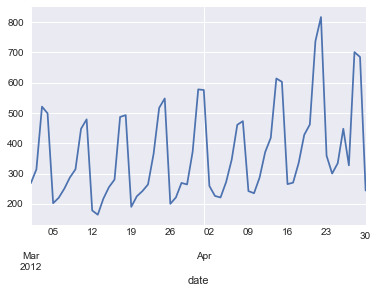

In [15]:
# sns.tsplot(data=grouped_by_date) 
grouped_by_date['login'].plot()
plt.savefig('grouped_by_date')

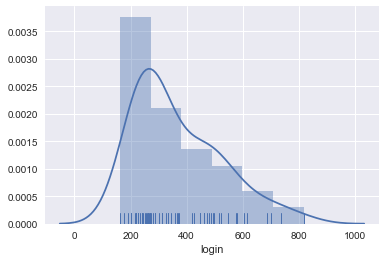

In [16]:
grouped_by_date.head()
sns.distplot(grouped_by_date['login'], kde=True, rug=True)
plt.savefig('grouped_by_date_hist')

## Questions 2 and 3

In [17]:
grouped_by_date = df[['login','date']].groupby(['date'], as_index=False).count()
std = grouped_by_date.std()
std
#plt.errorbar(grouped_by_date['login'],grouped_by_date['date'],yerr=2*std)

login    154.959618
dtype: float64

In [18]:
df.sort_values(by=['day_of_week','day','hour'],ascending=True,inplace=True)
df.head()

,login,date,month,day,hour,day_of_week,day_string
10707,2012-04-02 00:02:38,2012-04-02,4,2,0,0,Mon
10708,2012-04-02 00:04:20,2012-04-02,4,2,0,0,Mon
10709,2012-04-02 00:07:31,2012-04-02,4,2,0,0,Mon
10710,2012-04-02 00:08:12,2012-04-02,4,2,0,0,Mon
10711,2012-04-02 00:11:40,2012-04-02,4,2,0,0,Mon


In [19]:
# run linear regression to establish trend; then see if variation is changing by week
df['week'] = df['login'].dt.week
grouped_by_week = df[['login','week','date']].groupby(['date','week'], as_index=False).count()
grouped_by_week.head()

,date,week,login
0,2012-03-01,9,268
1,2012-03-02,9,314
2,2012-03-03,9,521
3,2012-03-04,9,499
4,2012-03-05,10,202


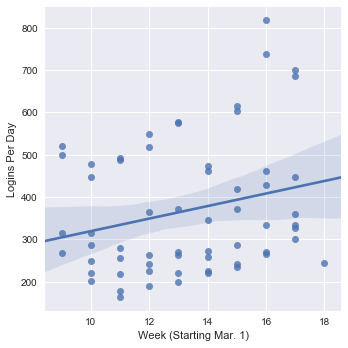

In [20]:
f = sns.lmplot(x="week", y="login", data=grouped_by_week)
f.set_axis_labels("Week (Starting Mar. 1)", "Logins Per Day")
plt.savefig('lmplot')

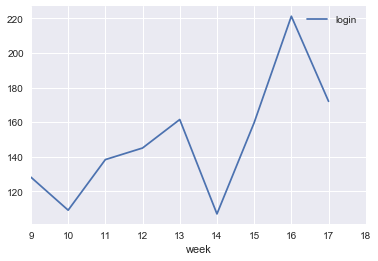

In [21]:
grouped_by_week.groupby('week').std().plot()
plt.savefig('std_dev_by_weeks')

In [22]:
grouped_by_date.loc[grouped_by_date['login'].idxmax()]

date     2012-04-22 00:00:00
login                    817
Name: 52, dtype: object

In [23]:
grouped_by_day_of_week = df[['day_of_week','day_string','login']].groupby(['day_string'], as_index=False).count()
grouped_by_day_of_week

,day_string,day_of_week,login
0,Fri,3198,3198
1,Mon,2139,2139
2,Sat,5064,5064
3,Sun,5173,5173
4,Thurs,2857,2857
5,Tues,1861,1861
6,Wed,2155,2155


## Question 4: Logins by day of week AND by month

In [24]:
grouped_by_day_month = df[['day_string','month','login']].groupby(['day_string','month'], as_index=False).count()

In [25]:
# grouped_by_day_month.sort_values(by=['login','month'],ascending=False)
grouped_by_day_month

,day_string,month,login
0,Fri,3,1645
1,Fri,4,1553
2,Mon,3,770
3,Mon,4,1369
4,Sat,3,2551
5,Sat,4,2513
6,Sun,3,2019
7,Sun,4,3154
8,Thurs,3,1338
9,Thurs,4,1519


In [26]:
# make day_string categorical so that we can graph with days of week in order (aka Monday, Tues... Sunday)
grouped_by_day_month['day_string_cat'] = grouped_by_day_month['day_string'].astype('category', categories=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'], ordered=False)
grouped_by_day_month.sort_values(by=['day_string_cat'],ascending=True,inplace=True)

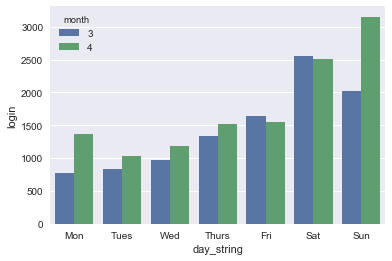

In [27]:
sns.barplot(x="day_string", y="login", hue="month", data=grouped_by_day_month)
plt.savefig('grouped_day_month_bars')

## Question 4: Logins by hour of day


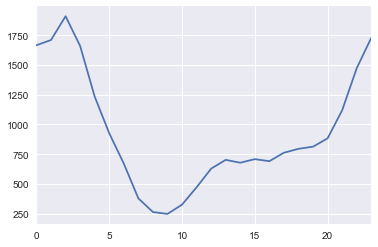

In [28]:
grouped_by_hour = df.groupby(['hour'], as_index=False).count()
grouped_by_hour['login'].plot()
plt.savefig('grouped_by_hours')

In [30]:
grouped_by_hour['login'].describe()

count      24.000000
mean      935.291667
std       508.471920
min       247.000000
25%       660.250000
50%       778.500000
75%      1294.500000
max      1911.000000
Name: login, dtype: float64

## Question 4: Logins by hour of day and day of week

In [31]:
grouped_by_day_hour = df[['day_string','hour','login']].groupby(['day_string','hour'], as_index=False).count()

In [32]:
grouped_by_day_hour = grouped_by_day_hour.pivot(index='hour', columns='day_string', values='login')

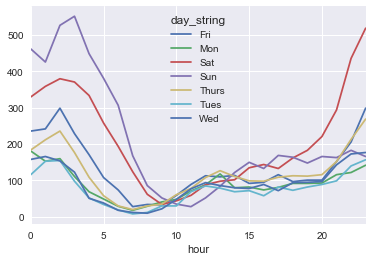

In [33]:
grouped_by_day_hour.plot()
plt.savefig('grouped_by_day_hour')